In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load real estate data
df_real_estate = pd.read_csv('real_estate_data.csv')

# Load Case-Shiller data
df_cs = pd.read_csv('Case-Shiller.csv')
df_cs['DATE'] = pd.to_datetime(df_cs['DATE'])

# Example merge strategy: merge based on the year
df_real_estate['Year'] = pd.to_datetime(df_real_estate['YourDateColumn']).dt.year
df_cs['Year'] = df_cs['DATE'].dt.year
df_merged = pd.merge(df_real_estate, df_cs[['Year', 'CSUSHPINSA']], on='Year', how='left')

# Assuming 'ROI' is your target variable
X = df_merged.drop(['ROI', 'YourDateColumn', 'Year'], axis=1) # Exclude non-feature columns
y = df_merged['ROI']

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Define preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model.fit(X_train, y_train)

# Predicting
y_pred = model.predict(X_test)

# Calculating deviations
deviations = y_test - y_pred

# Create a DataFrame for easier visualization
deviation_df = pd.DataFrame({
    'Data Point Index': y_test.index,
    'Actual': y_test,
    'Predicted': y_pred,
    'Deviation': deviations
}).sort_values(by='Deviation', ascending=True)

# Print the DataFrame
print(deviation_df)


KeyError: 'YourDateColumn'

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load real estate data
df_real_estate = pd.read_csv('real_estate_data.csv')

# Load Case-Shiller data
df_cs = pd.read_csv('Case-Shiller.csv')
df_cs['DATE'] = pd.to_datetime(df_cs['DATE'])

# Replace 'Date' with the actual date column name in your df_real_estate DataFrame
df_real_estate['Year'] = pd.to_datetime(df_real_estate['Date']).dt.year
df_cs['Year'] = df_cs['DATE'].dt.year

# Merging the datasets based on the year
df_merged = pd.merge(df_real_estate, df_cs[['Year', 'CSUSHPINSA']], on='Year', how='left')

# Assuming 'ROI' is your target variable and excluding the original date columns
X = df_merged.drop(['ROI', 'Date', 'Year'], axis=1)  # Adjust column names as per your dataset
y = df_merged['ROI']

# Identifying categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Preprocessing: StandardScaler for numeric features and OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Creating a model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating deviations
deviations = y_test - y_pred

# Creating a DataFrame for visualization
deviation_df = pd.DataFrame({
    'Data Point Index': y_test.index,
    'Actual': y_test,
    'Predicted': y_pred,
    'Deviation': deviations
}).sort_values(by='Deviation', ascending=True)

# Printing the DataFrame
print(deviation_df)


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load real estate data
df_real_estate = pd.read_csv('real_estate_data.csv')

# Load Case-Shiller data
df_cs = pd.read_csv('Case-Shiller.csv')
df_cs['DATE'] = pd.to_datetime(df_cs['DATE'])

# Replace 'YourDateColumn' with the actual date column name in your df_real_estate DataFrame
df_real_estate['Year'] = pd.to_datetime(df_real_estate['YourDateColumn']).dt.year
df_cs['Year'] = df_cs['DATE'].dt.year

# Merging the datasets based on the year
df_merged = pd.merge(df_real_estate, df_cs[['Year', 'CSUSHPINSA']], on='Year', how='left')

# Assuming 'ROI' is your target variable and excluding the original date columns
X = df_merged.drop(['ROI', 'YourDateColumn', 'Year'], axis=1)  # Adjust column names as per your dataset
y = df_merged['ROI']

# Identifying categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Preprocessing: StandardScaler for numeric features and OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Creating a model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating deviations
deviations = y_test - y_pred

# Creating a DataFrame for visualization
deviation_df = pd.DataFrame({
    'Data Point Index': y_test.index,
    'Actual': y_test,
    'Predicted': y_pred,
    'Deviation': deviations
}).sort_values(by='Deviation', ascending=True)

# Printing the DataFrame
print(deviation_df)



KeyError: 'YourDateColumn'

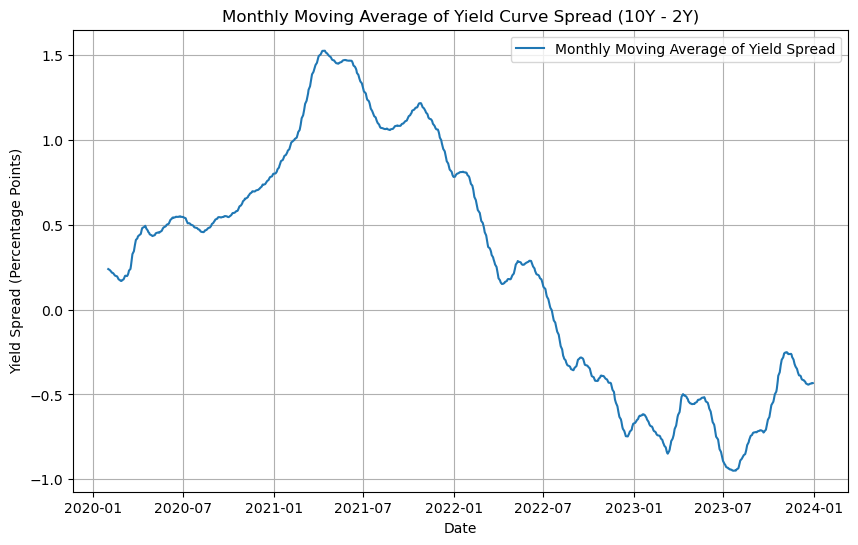

In [6]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime

# Define the tickers for 2-year and 10-year Treasury bond yields from FRED
ticker_2y = "DGS2"  # FRED code for 2-year Treasury bond yield
ticker_10y = "DGS10"  # FRED code for 10-year Treasury bond yield
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Fetch data from FRED
data_2y = pdr.DataReader(ticker_2y, 'fred', start, end)
data_10y = pdr.DataReader(ticker_10y, 'fred', start, end)

# Aligning both datasets on the same dates
combined_data = pd.concat([data_2y, data_10y], axis=1)
combined_data.columns = ['2Y', '10Y']

# Drop rows where either column (2Y or 10Y) is NaN
combined_data.dropna(inplace=True)

# Calculate the yield spread (10-year yield minus 2-year yield)
combined_data['Spread'] = combined_data['10Y'] - combined_data['2Y']

# Calculate the monthly moving average of the yield spread
combined_data['Monthly_MA'] = combined_data['Spread'].rolling(window=21).mean()

# Plotting the monthly moving average of the yield spread
plt.figure(figsize=(10, 6))
plt.plot(combined_data['Monthly_MA'], label='Monthly Moving Average of Yield Spread')
plt.title('Monthly Moving Average of Yield Curve Spread (10Y - 2Y)')
plt.ylabel('Yield Spread (Percentage Points)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()